# Porównanie wyników pomiarów wydajności QuadTree and KDTree

In [1]:
# Import data libraries, graph and timers
import pandas as pd
import matplotlib.pyplot as plt
import timeit
# Imports geometry utilities
from utilities.Point import Point
from utilities.Rectangle import Rectangle
# Imports modules for testing, benchmarking and visualizing
from visualizer.main import Visualizer
from comparator.CaseGenerator import CaseGenerator
from TestManager import TestManager
# Imports data structures (and their visualizers)
from KdTree import KdTree, KdTree_visualizer
from QuadTree import QuadTree, QuadTree_visualizer

## Spis treści:
1. Sprawdzenie poprawności działania porównywanych struktur danych
2. Pomiary wydajności dla różnych rozmiarów danych oraz rodzaju danych wejściowych
3. Generowanie wykresów
4. Pomiary dla indywidulanych przypadków pod zastosowania drzewa

## 1. Sprawdzenie poprawności działania porównywanych struktur danych

KdTree:

In [2]:
KdTree_tests = TestManager(KdTree).all_tests()

Running all tests:
Test contain_point_int:
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Passed 57/57 tests.
Test contain_point_float:
++++++++++
Passed 10/10 tests.
Test points_in_rectangle_int:
++++
Passed 4/4 tests.
Test points_in_rectangle_float:
+
Passed 1/1 tests.
Passed 72/72 of all tests.


QuadTree:

In [3]:
QuadTree_tests = TestManager(QuadTree).all_tests()

Running all tests:
Test contain_point_int:
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Passed 57/57 tests.
Test contain_point_float:
++++++++++
Passed 10/10 tests.
Test points_in_rectangle_int:
++++
Passed 4/4 tests.
Test points_in_rectangle_float:
+
Passed 1/1 tests.
Passed 72/72 of all tests.


Weryfikacja:

In [4]:
assert KdTree_tests and QuadTree_tests
print("All tests passed!")

All tests passed!


## 2. Pomiary wydajności

In [5]:
cg = CaseGenerator()
q_int = [10000*val for val in range(1, 11)]
q_2int = [(val//2, val//2) for val in q_int]
q_grid = [(100, val//100) for val in q_int]
q_clust = [val//3 for val in q_int]
q_out = [(val, 50) for val in q_int]

def benchmark(func, quantities, search_in=Rectangle([25, 25], [75, 75]), destination=Rectangle(Point([0,0]), Point([100,100])), cluster=None, title="Benchmark"):
    global q_int
    data = []
    data2 = []
    for q in quantities:
        if cluster is not None:
            points = func(q, cluster)
        else:
            points = func(q, destination)
        tkk = timeit.timeit(lambda: KdTree(points, points_in_node=1), number=3)
        tqk = timeit.timeit(lambda: QuadTree(points, points_in_node=1), number=3)
        kd = KdTree(points, points_in_node=1)
        qt = QuadTree(points, points_in_node=1)
        tks = timeit.timeit(lambda: kd.search_in_rectangle(search_in), number=3)
        tqs = timeit.timeit(lambda: qt.search_in_rectangle(search_in), number=3)
        data.append([tkk, tqk])
        data2.append([tks, tqs])
    qua = ["Liczba punktów"]    
    col = ["KdTree", "QuadTree"]
    top = ["", "Czas konstrukcji [s]", "Czas przeszukiwania [s]"]
    idx = list(range(1, len(quantities) + 1))
    df = pd.concat([pd.concat([pd.DataFrame(q_int, columns=qua, index=idx), 
                    pd.DataFrame(data, columns=col, index=idx), 
                    pd.DataFrame(data2, columns=col, index=idx)], axis=1, keys=top)], axis=1, keys=[title])
    return df


2.1 Rozkład jednorodny

In [6]:
df1 = benchmark(cg.uniform_distribution, q_int, title="Rozkład jednorodny")
df1

Rozkład jednorodny                                                         \
                      Czas konstrukcji [s]           Czas przeszukiwania [s]   
       Liczba punktów               KdTree  QuadTree                  KdTree   
1               10000             2.935456  0.968975                0.014849   
2               20000             5.866674  1.683554                0.020412   
3               30000             8.701872  2.491264                0.026527   
4               40000            12.070846  3.430156                0.026450   
5               50000            15.357549  4.309731                0.034865   
6               60000            19.002957  6.779930                0.035252   
7               70000            22.076605  5.570285                0.039494   
8               80000            23.967955  6.335521                0.040403   
9               90000            27.018624  7.202091                0.043356   
10             100000            30.258089  8.070076                0.050923   

              
              
    QuadTree  
1   0.018113  
2   0.029238  
3   0.035169  
4   0.044411  
5   0.067433  
6   0.066069  
7   0.070041  
8   0.086246  
9   0.083376  
10  0.087873

2.2 Rozkład normalny

In [7]:
df2 = benchmark(cg.normal_distribution, q_int, title="Rozkład normalny")
df2

Rozkład normalny                                                         \
                    Czas konstrukcji [s]           Czas przeszukiwania [s]   
     Liczba punktów               KdTree  QuadTree                  KdTree   
1             10000             2.907017  0.904052                0.024975   
2             20000             5.681524  1.766375                0.042992   
3             30000             9.249069  2.726048                0.043600   
4             40000            12.732404  3.682440                0.115853   
5             50000            16.699973  4.562457                0.060841   
6             60000            19.521455  5.640029                0.130833   
7             70000            24.554315  7.179918                0.078378   
8             80000            28.388549  7.173453                0.071187   
9             90000            28.158501  7.640593                0.088670   
10           100000            30.572305  8.215303                0.092241   

              
              
    QuadTree  
1   0.034352  
2   0.057501  
3   0.078725  
4   0.122134  
5   0.129749  
6   0.195747  
7   0.185668  
8   0.184085  
9   0.249298  
10  0.251938

2.3 Rozkład "posadzka"

In [8]:
df3 = benchmark(cg.grid_distribution, q_grid, title="Rozkład siatka")
df3

Rozkład siatka                                                         \
                  Czas konstrukcji [s]           Czas przeszukiwania [s]   
   Liczba punktów               KdTree  QuadTree                  KdTree   
1           10000             2.579883  0.539553                0.016468   
2           20000             5.628874  1.332478                0.024259   
3           30000             9.117861  2.286593                0.033980   
4           40000            12.719617  3.452157                0.042164   
5           50000            16.833230  4.185858                0.043474   
6           60000            20.246519  5.107188                0.054111   
7           70000            23.908128  6.053766                0.055567   
8           80000            27.825405  7.048668                0.063344   
9           90000            31.690058  7.999422                0.063983   
10         100000            35.505471  8.844390                0.066991   

              
              
    QuadTree  
1   0.013489  
2   0.021305  
3   0.028362  
4   0.041852  
5   0.044414  
6   0.047192  
7   0.050912  
8   0.062195  
9   0.062074  
10  0.069423

2.4.1 Rozkład klastrowy (z małą ilością punktów w przeszukiwanym obszarze) 

In [9]:
c = (Rectangle(Point([0,0]), Point([10,10])), Rectangle(Point([40,50]), Point([60,90])), Rectangle(Point([80,20]), Point([90,30])))
df4_1 = benchmark(cg.cluster_distribution, q_clust, search_in=Rectangle([9, 9], [70, 51]), cluster=c, title="Rozkład klastrowy (1)")
df4_1

Rozkład klastrowy (1)                                 \
                         Czas konstrukcji [s]             
          Liczba punktów               KdTree  QuadTree   
1                  10000             2.474442  0.748659   
2                  20000             5.157548  1.615624   
3                  30000             8.217013  2.464410   
4                  40000            11.026490  3.234298   
5                  50000            14.123254  4.084977   
6                  60000            20.191517  6.480312   
7                  70000            23.395542  6.591181   
8                  80000            24.736280  6.906025   
9                  90000            27.396725  8.117556   
10                100000            31.537091  8.808446   

                                      
   Czas przeszukiwania [s]            
                    KdTree  QuadTree  
1                 0.016925  0.003735  
2                 0.023434  0.005171  
3                 0.028774  0.006081  
4                 0.034306  0.007390  
5                 0.040056  0.009353  
6                 0.055501  0.012177  
7                 0.045731  0.009888  
8                 0.049959  0.010740  
9                 0.050834  0.011703  
10                0.053635  0.012054

2.4.2 Rozkład klastrowy (z dużą ilością punktów w przeszukiwanym obszarze)

In [10]:
c = (Rectangle(Point([0,0]), Point([10,10])), Rectangle(Point([40,50]), Point([60,90])), Rectangle(Point([80,20]), Point([90,30])))
df4_2 = benchmark(cg.cluster_distribution, q_clust, search_in=Rectangle([40, 20], [100, 70]), cluster=c, title="Rozkład klastrowy (2)")
df4_2

Rozkład klastrowy (2)                                 \
                         Czas konstrukcji [s]             
          Liczba punktów               KdTree  QuadTree   
1                  10000             2.869250  0.808106   
2                  20000             5.666016  1.635281   
3                  30000             8.001028  2.379059   
4                  40000            11.810226  3.410880   
5                  50000            14.338349  4.135182   
6                  60000            18.211260  5.550930   
7                  70000            20.825383  6.865385   
8                  80000            25.081697  6.674160   
9                  90000            27.126649  7.305605   
10                100000            29.896290  8.692203   

                                      
   Czas przeszukiwania [s]            
                    KdTree  QuadTree  
1                 0.015155  0.011343  
2                 0.023768  0.021866  
3                 0.027360  0.043926  
4                 0.033666  0.045993  
5                 0.038542  0.058084  
6                 0.045640  0.067375  
7                 0.051133  0.085017  
8                 0.047660  0.116953  
9                 0.058406  0.100587  
10                0.065669  0.103021

2.5.1 Rozkład z wartościami odstającymi (z małą ilością punktów w przeszukiwanym obszarze)

In [11]:
df5_1 = benchmark(cg.outliers_distribution, q_out, search_in=Rectangle([0,10], [90,20]), title="Rozkład z odstającymi (1)")
df5_1

Rozkład z odstającymi (1)                                 \
                             Czas konstrukcji [s]             
              Liczba punktów               KdTree  QuadTree   
1                      10000             2.648853  0.746281   
2                      20000             5.392280  1.706719   
3                      30000             8.709869  2.681333   
4                      40000            12.091857  3.245987   
5                      50000            15.075493  4.108734   
6                      60000            17.323270  4.787732   
7                      70000            20.280720  5.639359   
8                      80000            24.913731  6.880369   
9                      90000            27.397116  7.311095   
10                    100000            33.588120  8.563573   

                                      
   Czas przeszukiwania [s]            
                    KdTree  QuadTree  
1                 0.007779  0.000685  
2                 0.012204  0.000640  
3                 0.013899  0.000330  
4                 0.017405  0.000890  
5                 0.017558  0.000664  
6                 0.019886  0.000714  
7                 0.022822  0.000704  
8                 0.023304  0.000630  
9                 0.030050  0.001497  
10                0.026436  0.000475

2.5.2 Rozkład z wartościami odstającymi (z dużą ilością punktów w przeszukiwanym obszarze)

In [12]:
df5_2 = benchmark(cg.outliers_distribution, q_out, search_in=Rectangle([40,40], [80,70]), title="Rozkład z odstającymi (2)")
df5_2

Rozkład z odstającymi (2)                                 \
                             Czas konstrukcji [s]             
              Liczba punktów               KdTree  QuadTree   
1                      10000             2.616711  0.828972   
2                      20000             5.690632  1.567821   
3                      30000             7.994619  2.326171   
4                      40000            11.003104  3.176336   
5                      50000            14.817837  4.372771   
6                      60000            18.907074  5.300017   
7                      70000            21.387008  5.824630   
8                      80000            24.097768  6.717994   
9                      90000            29.630626  8.412753   
10                    100000            30.832046  8.090855   

                                      
   Czas przeszukiwania [s]            
                    KdTree  QuadTree  
1                 0.016119  0.017496  
2                 0.022927  0.031571  
3                 0.029043  0.045690  
4                 0.033905  0.057783  
5                 0.039126  0.072091  
6                 0.047927  0.094321  
7                 0.050005  0.092701  
8                 0.069336  0.130566  
9                 0.058551  0.140486  
10                0.056439  0.140971

2.6 Rozkład krzyżowy

In [13]:
df6 = benchmark(cg.cross_distribution, q_2int, search_in=Rectangle([40,25], [75, 60]), title="Rozkład krzyż")
df6

Rozkład krzyż                                                          \
                  Czas konstrukcji [s]            Czas przeszukiwania [s]   
   Liczba punktów               KdTree   QuadTree                  KdTree   
1           10000             4.754609   1.386820                0.130374   
2           20000            10.156818   2.943676                0.246619   
3           30000            15.499020   4.414122                0.265840   
4           40000            20.356508   5.413641                0.356135   
5           50000            26.953524   7.162225                0.620189   
6           60000            32.417240   8.384948                0.639664   
7           70000            38.516648  10.377367                0.636907   
8           80000            44.966483  12.298339                0.986503   
9           90000            50.493001  14.051579                0.829571   
10         100000            60.479300  15.616852                1.645027   

              
              
    QuadTree  
1   0.005910  
2   0.021254  
3   0.019381  
4   0.023203  
5   0.034306  
6   0.047386  
7   0.058858  
8   0.060607  
9   0.083537  
10  0.166334

2.7 Rozkład prostokątny

In [14]:
df7 = benchmark(cg.rectangle_distribution, q_int, search_in=Rectangle([20,20], [70,100]), title="Rozkład prostokąt")
df7

Rozkład prostokąt                                                          \
                     Czas konstrukcji [s]            Czas przeszukiwania [s]   
      Liczba punktów               KdTree   QuadTree                  KdTree   
1              10000             5.130688   1.330831                0.091557   
2              20000             9.755798   2.847253                0.001439   
3              30000            15.040221   4.902638                0.001568   
4              40000            19.625943   5.465709                0.001790   
5              50000            24.963657   6.392687                0.268317   
6              60000            31.157318   7.788729                0.002060   
7              70000            34.561701   9.960314                0.259777   
8              80000            41.837757  11.740277                0.002785   
9              90000            48.663707  13.259330                0.003088   
10            100000            54.461508  13.949669                0.552564   

              
              
    QuadTree  
1   0.002714  
2   0.004986  
3   0.006730  
4   0.011287  
5   0.011912  
6   0.015395  
7   0.025478  
8   0.021892  
9   0.021857  
10  0.023225

## 3. Generowanie wykresów

In [15]:
def show_graphs(df, title):
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
    fig.suptitle(title)
    ax1.title.set_text("Czas konstrukcji")
    ax1.plot(df[title][""]["Liczba punktów"], df[title, "Czas konstrukcji [s]"]["KdTree"], label="KdTree", marker="o")
    ax1.plot(df[title][""]["Liczba punktów"], df[title, "Czas konstrukcji [s]"]["QuadTree"], label="QuadTree", marker="o")
    ax1.set_ylabel("Czas konstrukcji [s]")
    ax1.set_xlabel("Liczba punktów")
    ax1.legend()
    ax2.title.set_text("Czas przeszukiwania")
    ax2.plot(df[title][""]["Liczba punktów"], df[title, "Czas przeszukiwania [s]"]["KdTree"], label="KdTree", marker="o")
    ax2.plot(df[title][""]["Liczba punktów"], df[title, "Czas przeszukiwania [s]"]["QuadTree"], label="QuadTree", marker="o")
    ax2.set_ylabel("Czas przeszukiwania [s]")
    ax2.set_xlabel("Liczba punktów")
    ax2.legend()
    plt.show()    

3.1 Rozkład równomierny

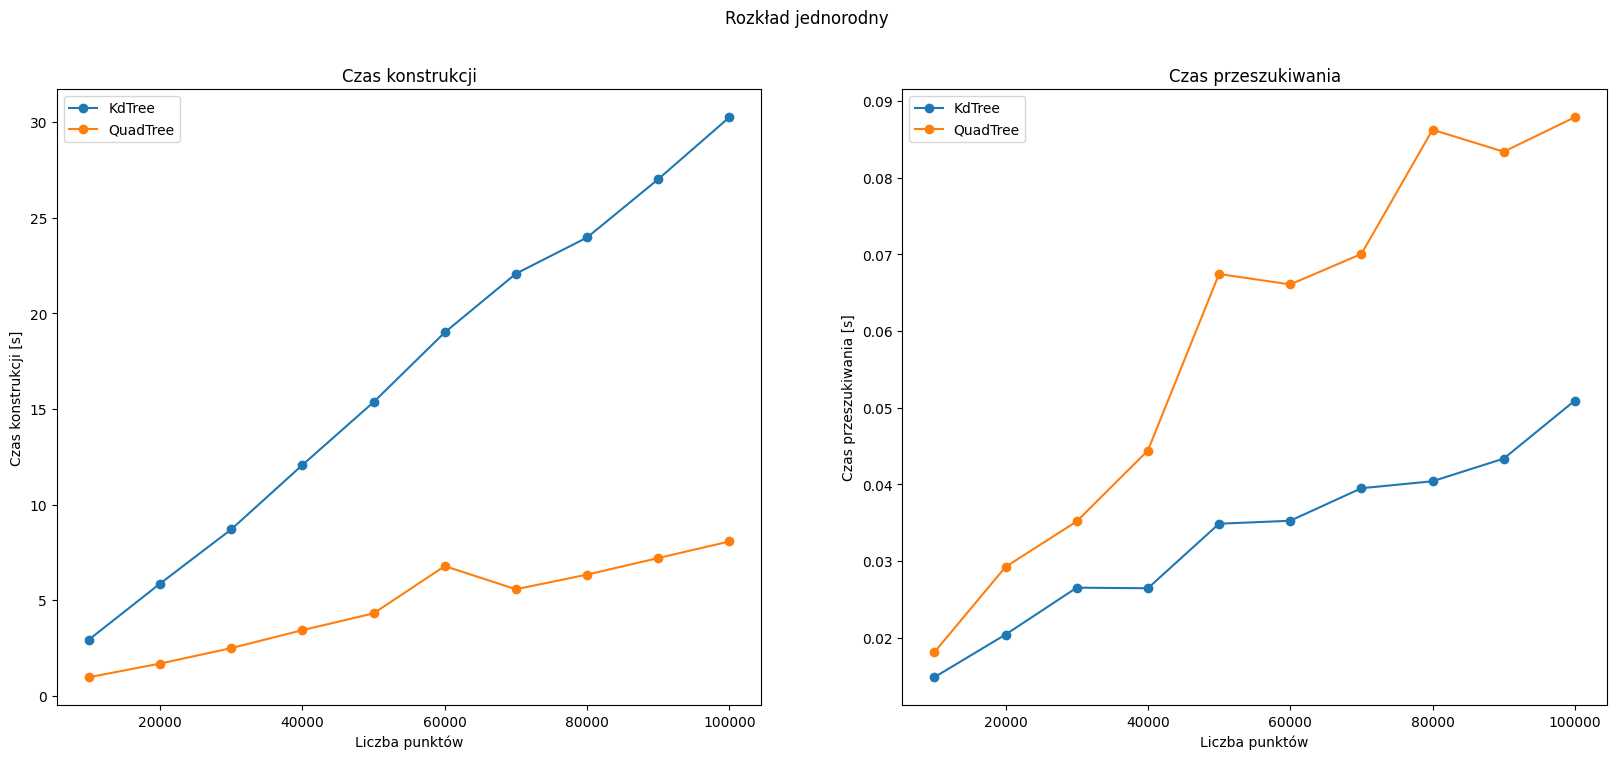

In [16]:
show_graphs(df1, "Rozkład jednorodny")

3.2 Rozkład normalny

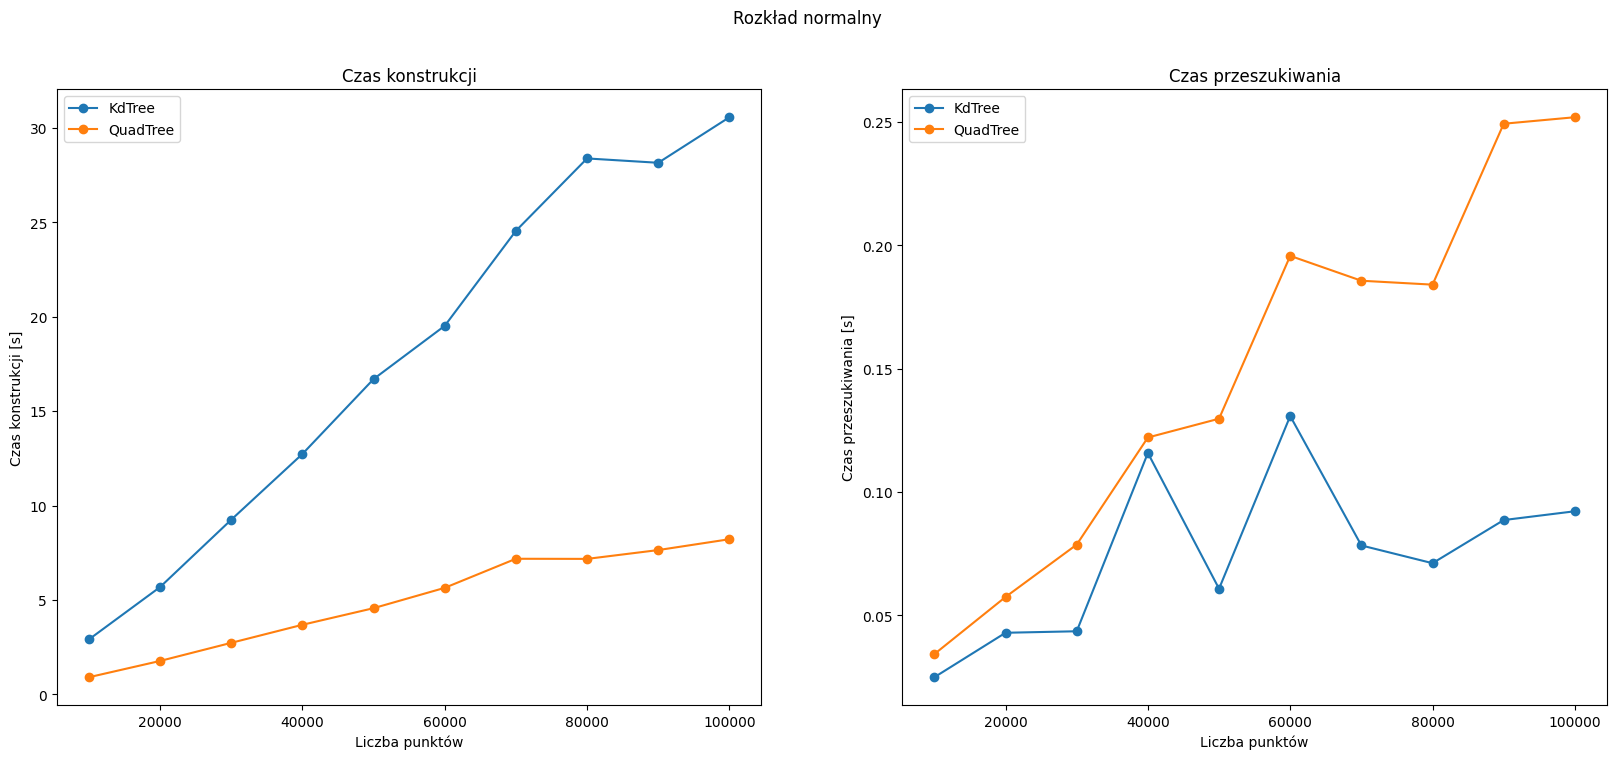

In [17]:
show_graphs(df2, "Rozkład normalny")

3.3 Rozkład "posadzka"

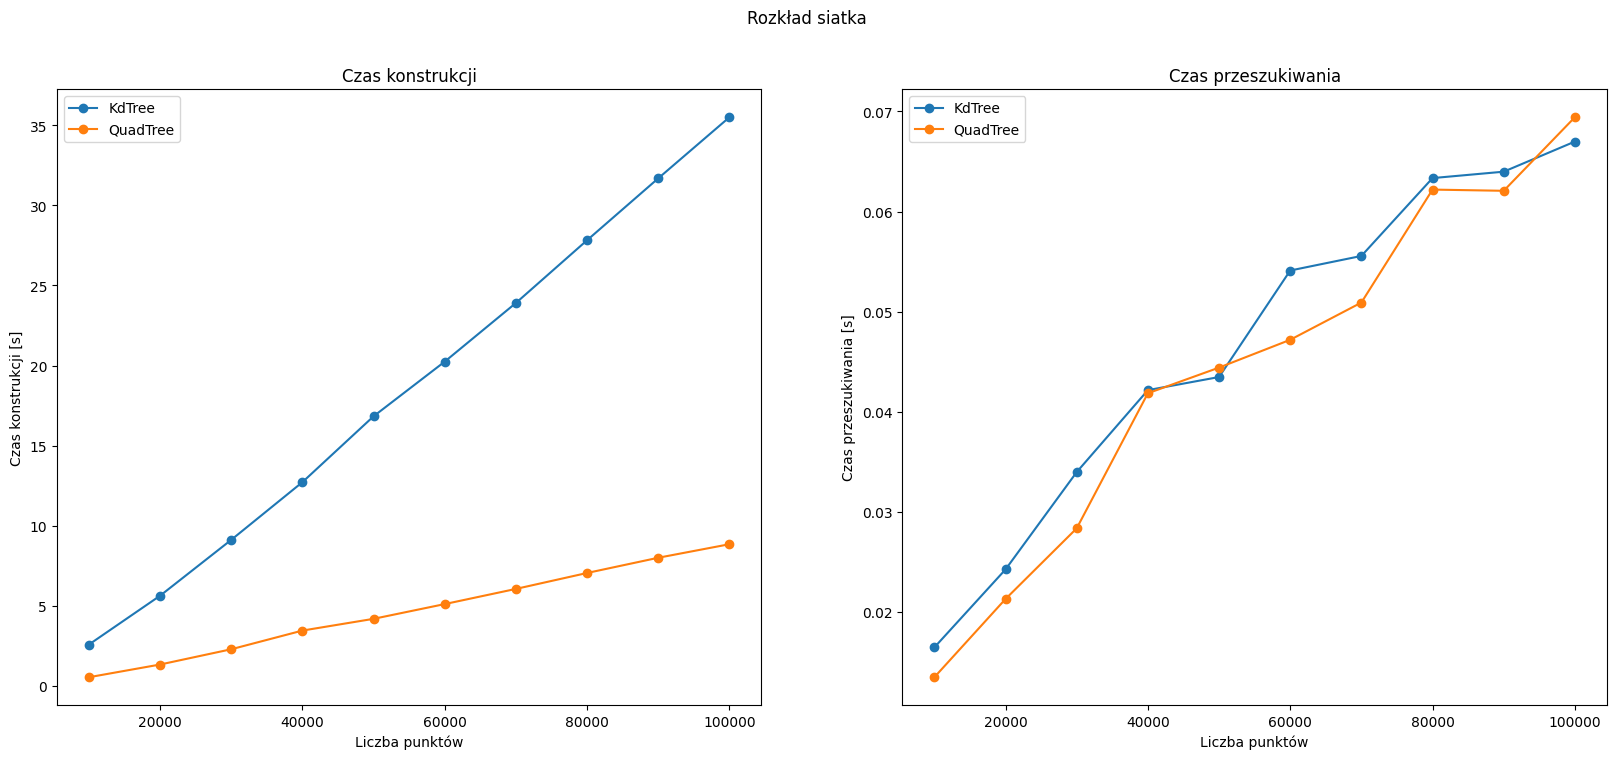

In [18]:
show_graphs(df3, "Rozkład siatka")

3.4.1 Rozkład klastrowy (z małą ilością punktów w przeszukiwanym obszarze)

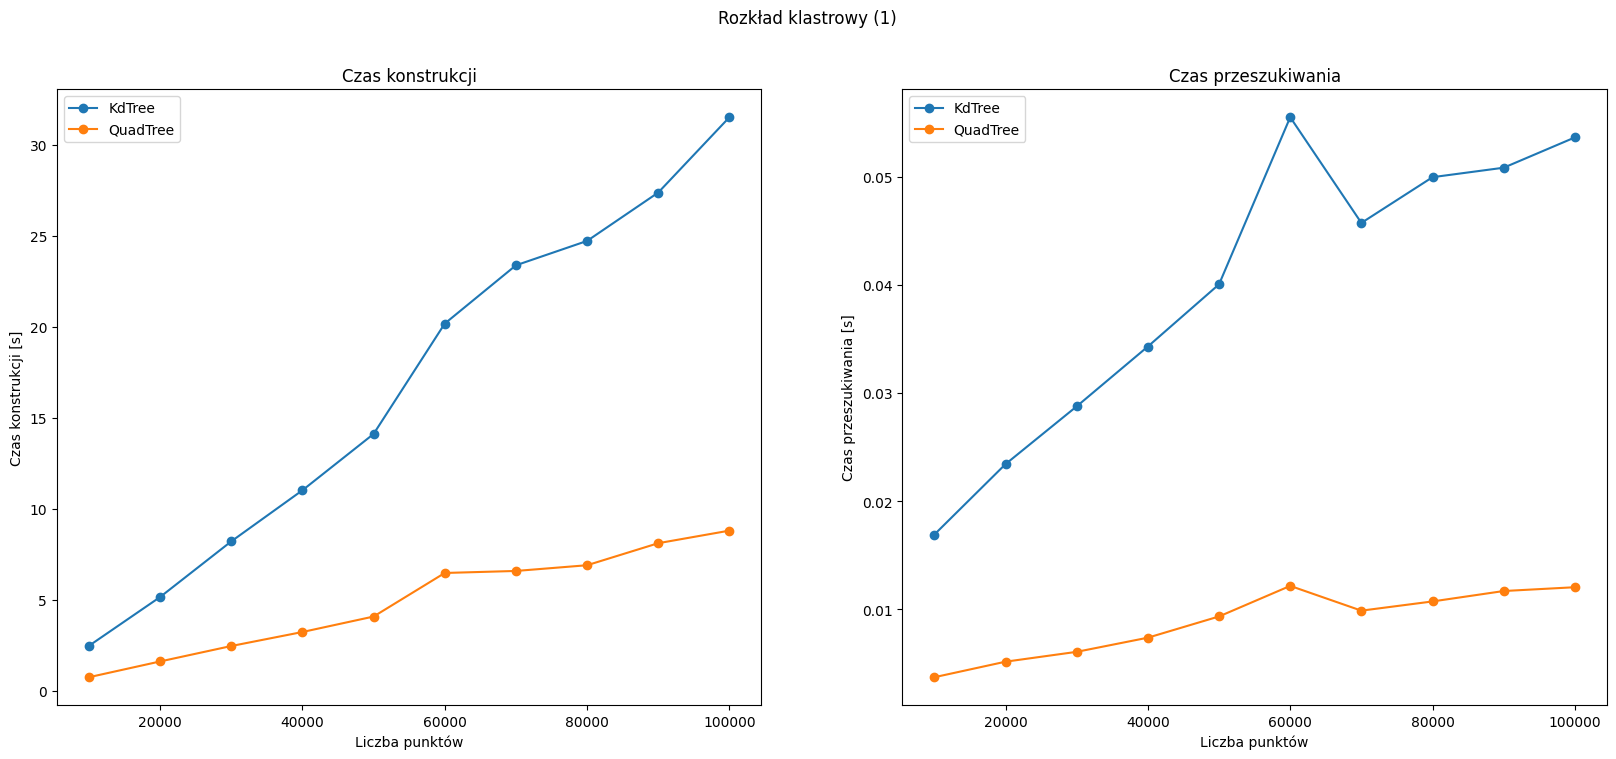

In [19]:
show_graphs(df4_1, "Rozkład klastrowy (1)")

3.4.2 Rozkład klastrowy (z dużą ilością punktów w przeszukiwanym obszarze)

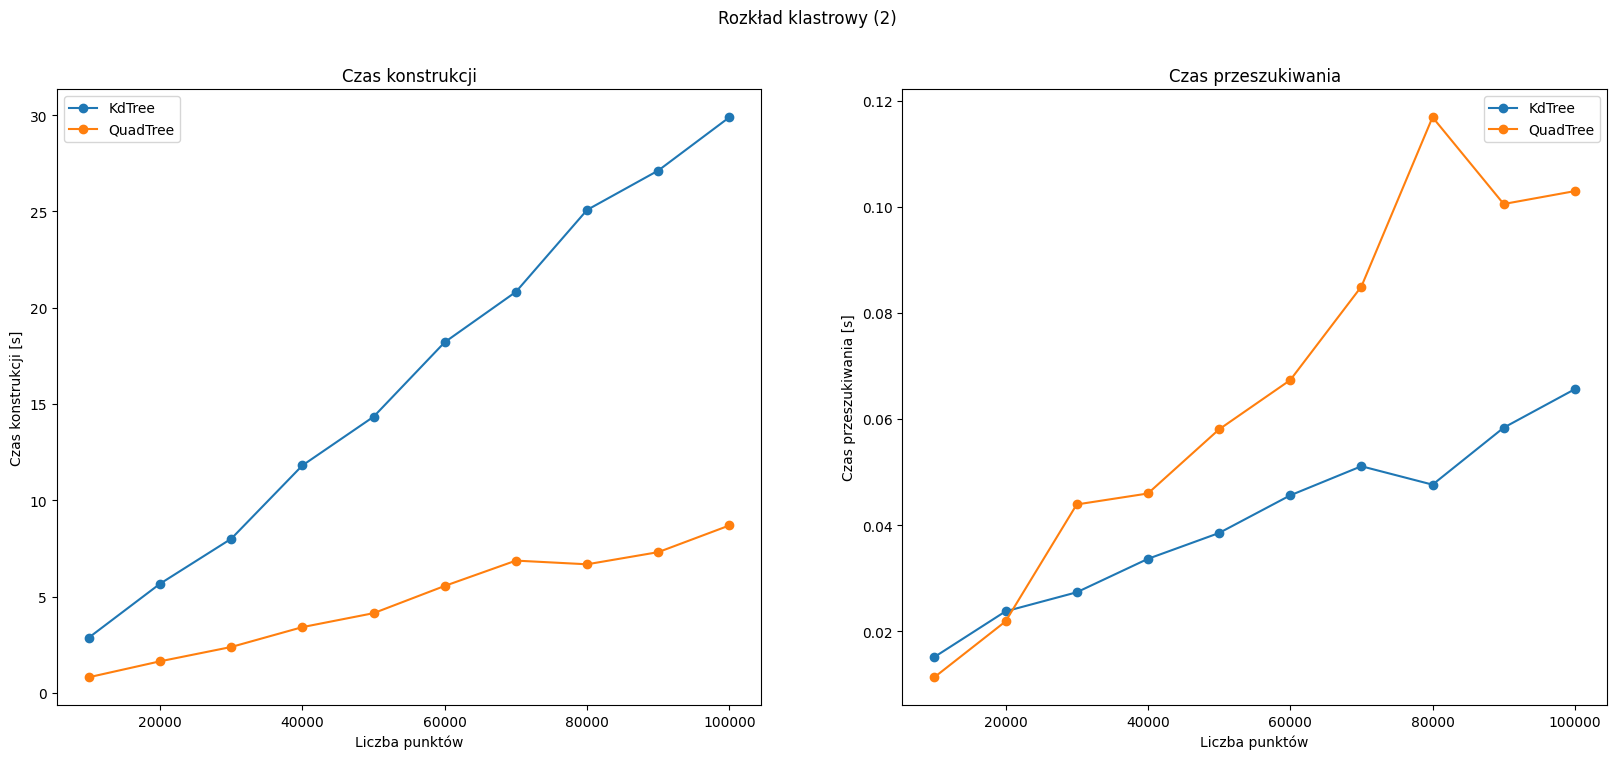

In [20]:
show_graphs(df4_2, "Rozkład klastrowy (2)")

3.5 Rozkład z wartościami odstającymi (z małą ilością punktów w przeszukiwanym obszarze)

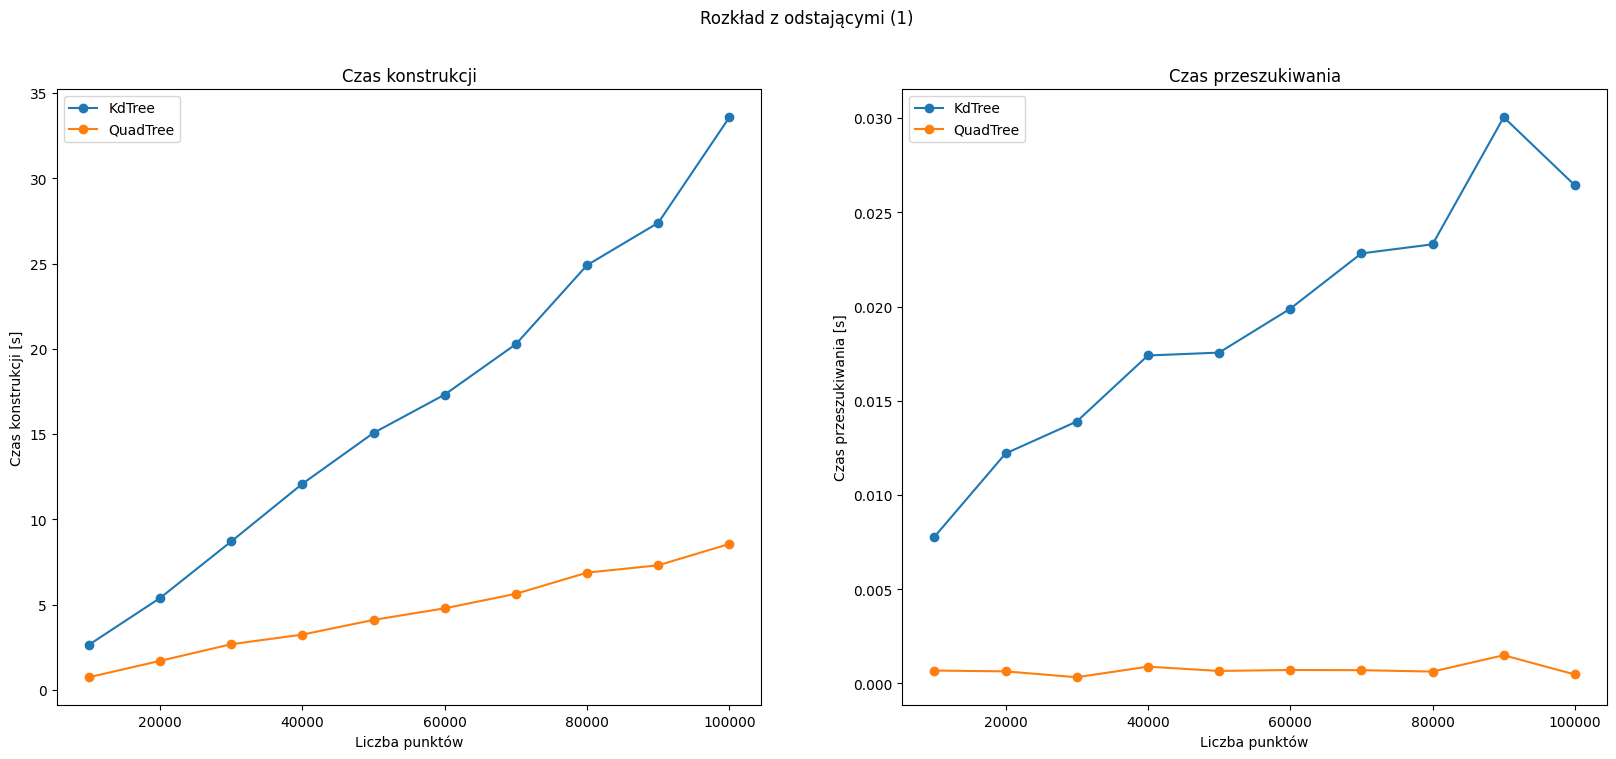

In [21]:
show_graphs(df5_1, "Rozkład z odstającymi (1)")

3.5.2 Rozkład z wartościami odstającymi (z dużą ilością punktów w przeszukiwanym obszarze)

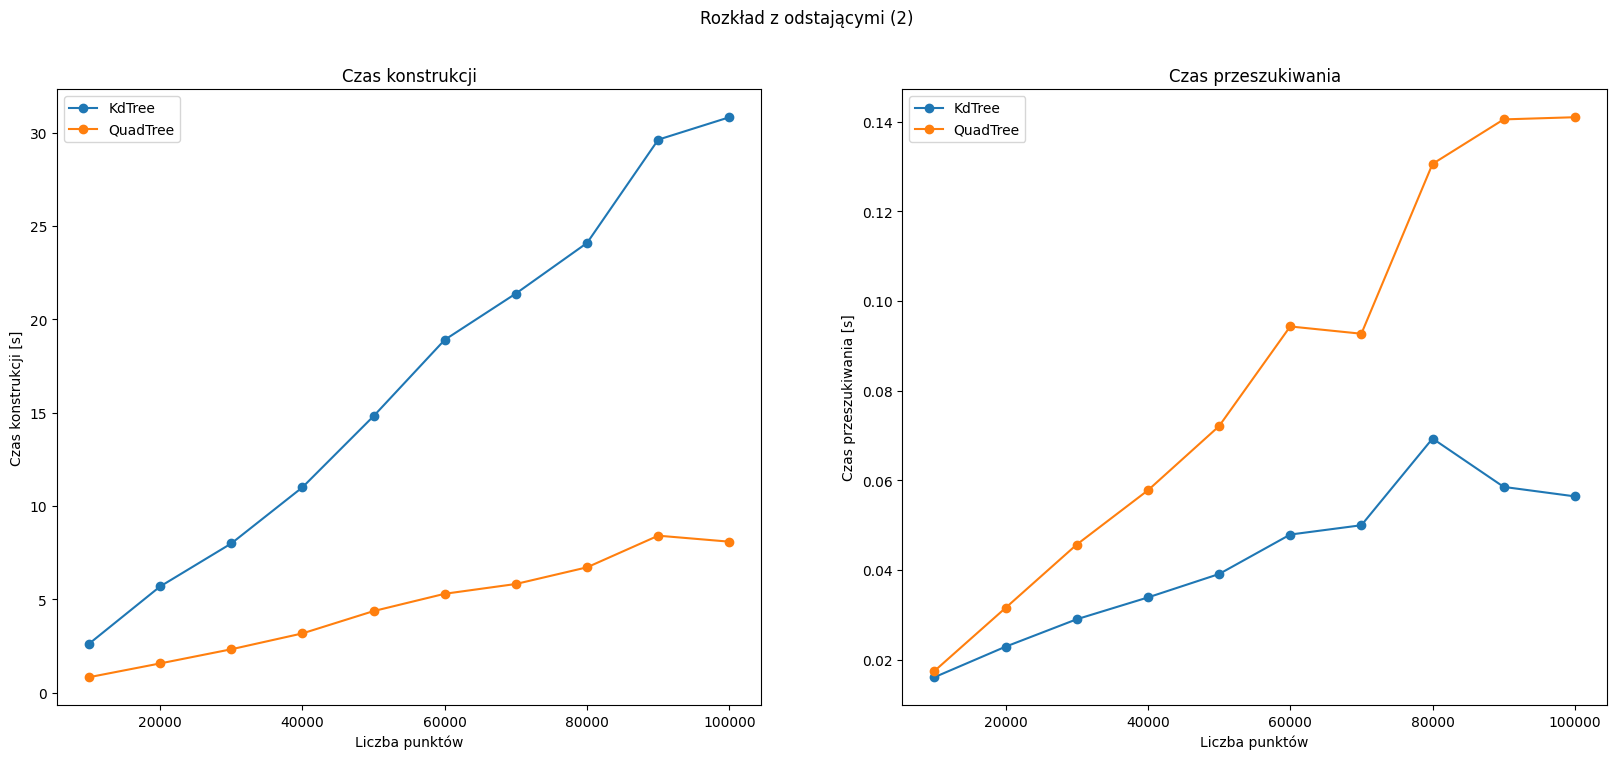

In [22]:
show_graphs(df5_2, "Rozkład z odstającymi (2)")

3.6 Rozkład krzyżowy

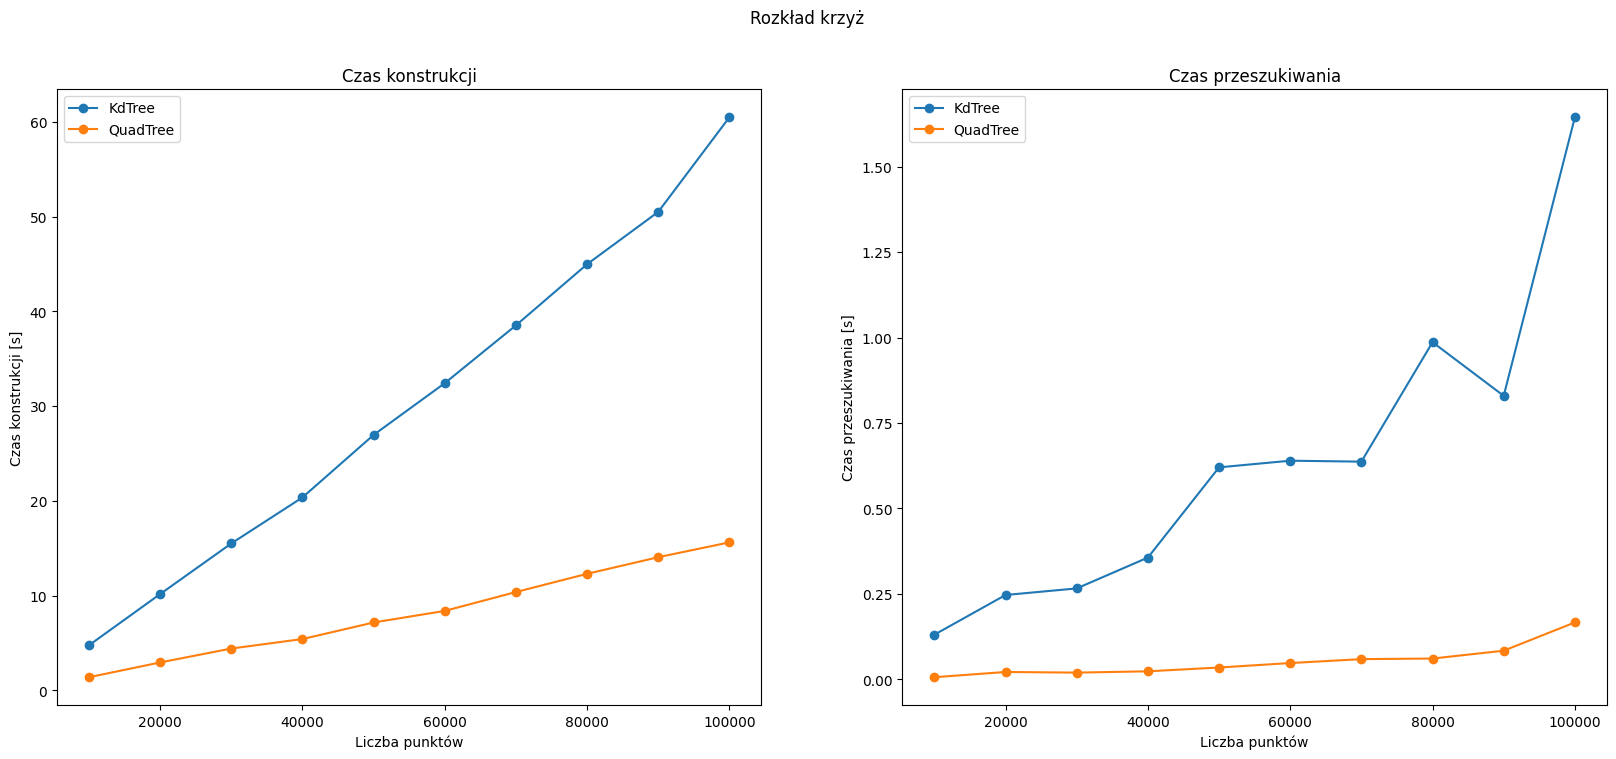

In [23]:
show_graphs(df6, "Rozkład krzyż")

3.7 Rozkład prostokątny

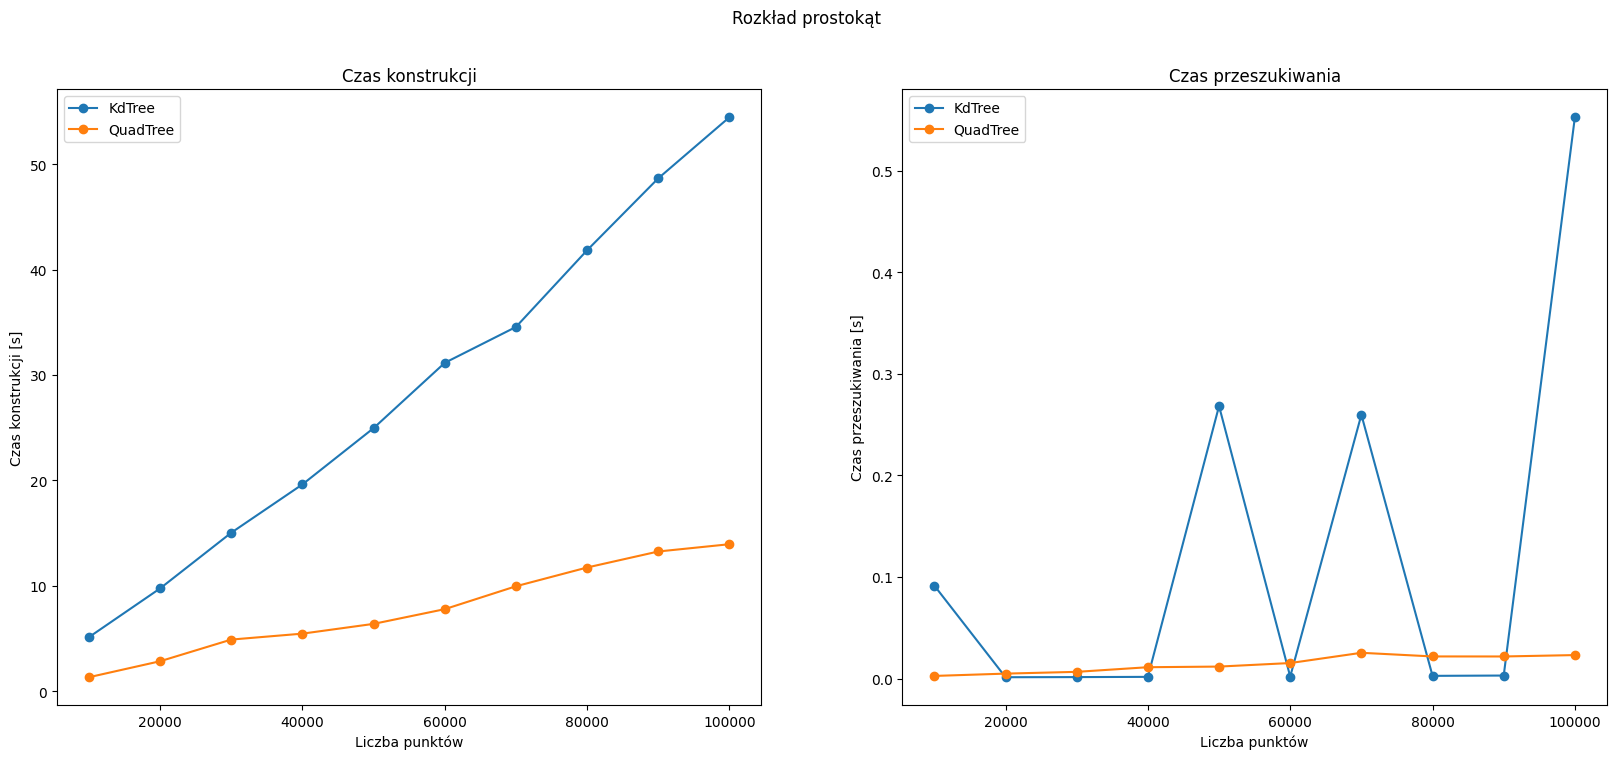

In [24]:
show_graphs(df7, "Rozkład prostokąt")

## 4. Pomiary dla indywidulanych przypadków pod zastosowania drzewa

4.1 Wydajność dla KDTree w zależności od ilości wymiarów

In [48]:
def kdim_compare():
    data = []
    for k in range(2, 51):
        points = cg.uniform_distribution(1000, Rectangle(Point([0 for _ in range(k)]), Point([100 for _ in range(k)])))
        tkk = timeit.timeit(lambda: KdTree(points, points_in_node=1), number=3)
        kd = KdTree(points, points_in_node=1)
        tks = timeit.timeit(lambda: kd.search_in_rectangle(Rectangle([25 for _ in range(k)], [75 for _ in range(k)])), number=3)
        data.append([tkk, tks])
    top = ["Wydajność KdTree w zależności od ilości wymiarów"]
    col = ["Czas konstrukcji [s]", "Czas przeszukiwania [s]"]
    idx = list(range(2, 51))
    df = pd.concat([pd.DataFrame(data, columns=col, index=idx)], axis=1, keys=top)
    return df

df_kdim = kdim_compare()
df_kdim

Wydajność KdTree w zależności od ilości wymiarów                        
                               Czas konstrukcji [s] Czas przeszukiwania [s]
2                                          0.217700                0.003601
3                                          0.202156                0.010087
4                                          0.227205                0.009615
5                                          0.285631                0.017398
6                                          0.242246                0.017872
7                                          0.273796                0.024559
8                                          0.279275                0.025407
9                                          0.260229                0.024389
10                                         0.270443                0.021412
11                                         0.275667                0.023910
12                                         0.285406                0.024120
13                                         0.294587                0.025628
14                                         0.356852                0.026819
15                                         0.351682                0.025182
16                                         0.313821                0.027985
17                                         0.316263                0.025819
18                                         0.324477                0.027177
19                                         0.334337                0.028523
20                                         0.349062                0.029699
21                                         0.354218                0.028266
22                                         0.361207                0.028892
23                                         0.362880                0.027997
24                                         0.375613                0.032030
25                                         0.428282                0.029360
26                                         0.392038                0.030499
27                                         0.433225                0.030429
28                                         0.493531                0.037999
29                                         0.523989                0.038139
30                                         0.449210                0.031257
31                                         0.411716                0.031359
32                                         0.431687                0.030855
33                                         0.447744                0.031854
34                                         0.526653                0.046672
35                                         0.522888                0.039859
36                                         0.482332                0.033455
37                                         0.442374                0.056987
38                                         0.613420                0.044338
39                                         0.587960                0.055430
40                                         0.662618                0.035718
41                                         0.494790                0.036826
42                                         0.505769                0.038217
43                                         0.498026                0.036386
44                                         0.507534                0.037579
45                                         0.520066                0.038366
46                                         0.531449                0.039338
47                                         0.543013                0.037774
48                                         0.546383                0.039486
49                                         0.545332                0.042284
50                                         0.557953                0.040169

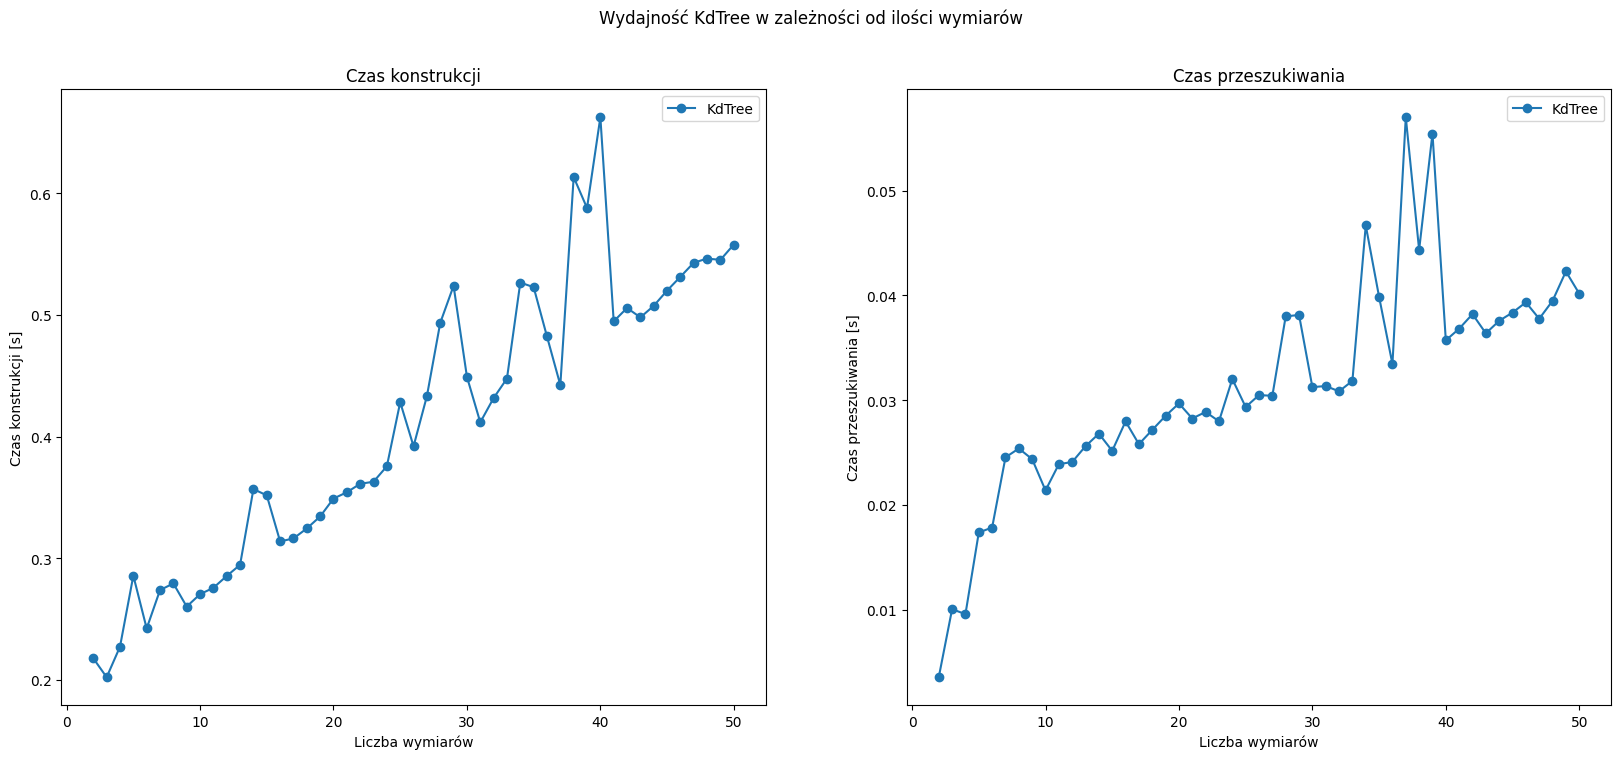

In [54]:
def kdim_graph(df, title = "Wydajność KdTree w zależności od ilości wymiarów"):
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
    fig.suptitle(title)
    ax1.title.set_text("Czas konstrukcji")
    ax1.plot(df[title]["Czas konstrukcji [s]"], label="KdTree", marker="o")
    ax1.set_ylabel("Czas konstrukcji [s]")
    ax1.set_xlabel("Liczba wymiarów")
    ax1.legend()
    ax2.title.set_text("Czas przeszukiwania")
    ax2.plot(df[title]["Czas przeszukiwania [s]"], label="KdTree", marker="o")
    ax2.set_ylabel("Czas przeszukiwania [s]")
    ax2.set_xlabel("Liczba wymiarów")
    ax2.legend()
    plt.show()

kdim_graph(df_kdim)

4.2 Wydajność dla QuadTree w zależności od wartości parametru `max_capacity`

In [67]:
def maxcap_compare():
    data = []
    for mc in range(1, 1001, 10):
        points = cg.uniform_distribution(5000, Rectangle(Point([0,0]), Point([100,100])))
        tqk = timeit.timeit(lambda: QuadTree(points, points_in_node=1, max_capacity=mc), number=2)
        qt = QuadTree(points, points_in_node=1, max_capacity=mc)
        tqs = timeit.timeit(lambda: qt.search_in_rectangle(Rectangle([25, 25], [75, 75])), number=2)
        data.append([tqk, tqs])
    top = ["Wydajność QuadTree w zależności od maksymalnej pojemności liścia"]
    col = ["Czas konstrukcji [s]", "Czas przeszukiwania [s]"]
    idx = list(range(1, 1001, 10))
    df = pd.concat([pd.DataFrame(data, columns=col, index=idx)], axis=1, keys=top)
    return df

df_maxcap = maxcap_compare()
df_maxcap

Wydajność QuadTree w zależności od maksymalnej pojemności liścia  \
                                                Czas konstrukcji [s]   
1                                             0.278704                 
11                                            0.120859                 
21                                            0.091705                 
31                                            0.192078                 
41                                            0.143025                 
..                                                 ...                 
951                                           0.055289                 
961                                           0.054673                 
971                                           0.057350                 
981                                           0.057134                 
991                                           0.057241                 

                             
    Czas przeszukiwania [s]  
1                  0.007760  
11                 0.010170  
21                 0.008104  
31                 0.008418  
41                 0.011032  
..                      ...  
951                0.020515  
961                0.026138  
971                0.023060  
981                0.024153  
991                0.021932  

[100 rows x 2 columns]

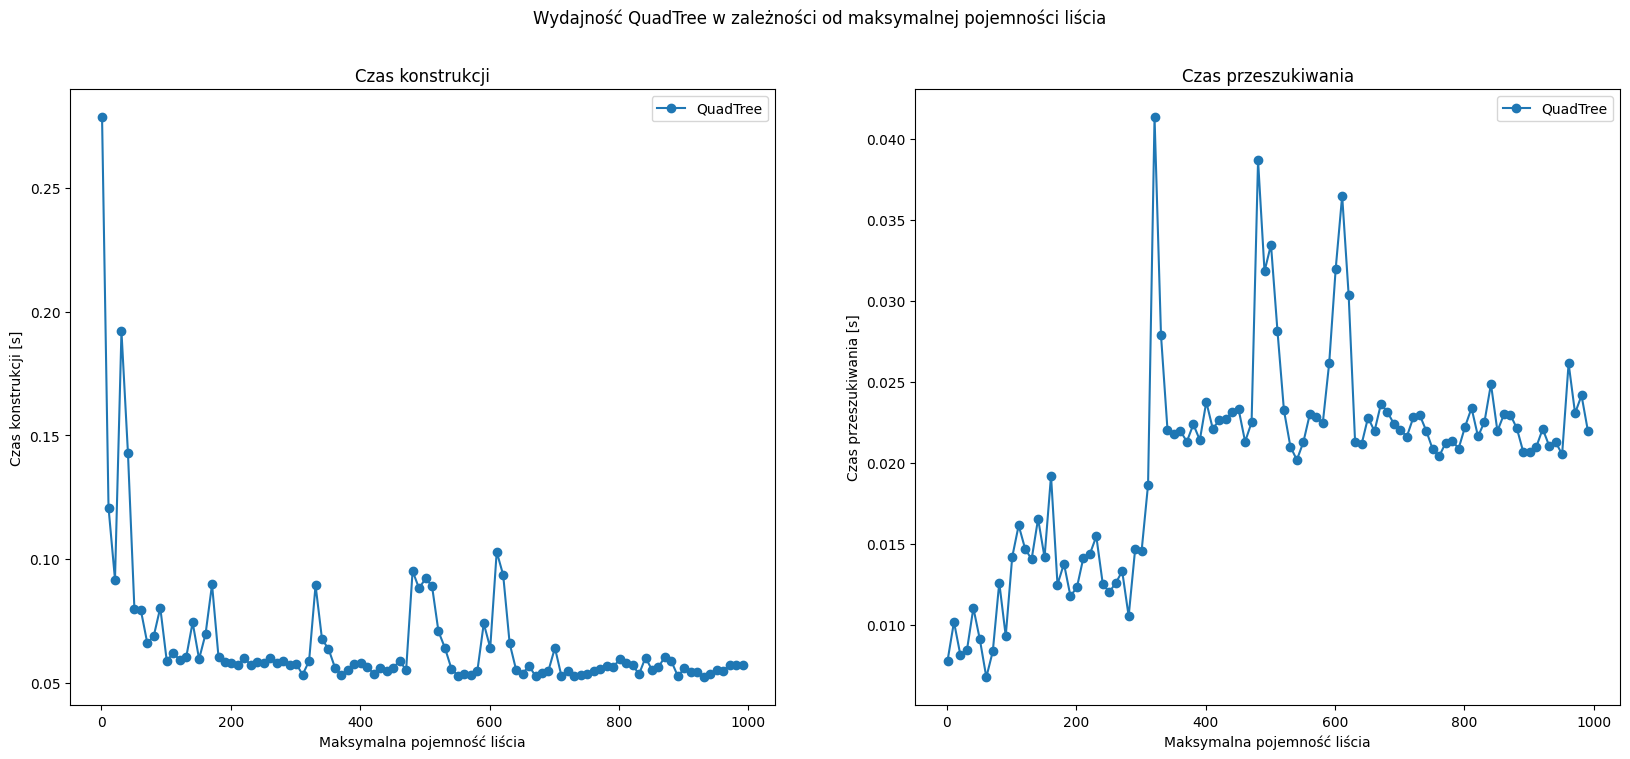

In [68]:
def maxcap_graph(df):
    title = "Wydajność QuadTree w zależności od maksymalnej pojemności liścia"
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
    fig.suptitle(title)
    ax1.title.set_text("Czas konstrukcji")
    ax1.plot(df[title]["Czas konstrukcji [s]"], label="QuadTree", marker="o")
    ax1.set_ylabel("Czas konstrukcji [s]")
    ax1.set_xlabel("Maksymalna pojemność liścia")
    ax1.legend()
    ax2.title.set_text("Czas przeszukiwania")
    ax2.plot(df[title]["Czas przeszukiwania [s]"], label="QuadTree", marker="o")
    ax2.set_ylabel("Czas przeszukiwania [s]")
    ax2.set_xlabel("Maksymalna pojemność liścia")
    ax2.legend()
    plt.show()

maxcap_graph(df_maxcap)

## 5. Wizualizacja powyższych zbiorów, oraz siatki.

In [29]:
q_norm = 500
q_grid = (21,21)
q_clust = 165
q_out = (490, 10)
q_cross = (250,250)
def generate_visualization(func, quantity, shape,rec_for_search):
    vis_points = Visualizer()
    points = func(quantity,shape)
    vis_points.add_point(points)
    vis_KD = KdTree_visualizer(points, points_in_node=False, visualize_gif=False)
    vis_QT = QuadTree_visualizer(points, points_in_node=False, visualize_gif=False)
    _,vis_rec1 = vis_KD.search_in_rectangle(rec_for_search, visualize_gif=False)
    _,vis_rec2 = vis_QT.search_in_rectangle(rec_for_search, visualize_gif=False)
    vis_points.show()
    vis_KD.vis.show()
    vis_QT.vis.show()
    vis_rec1.show()
    vis_rec2.show()

5.1 Rozkład równomierny

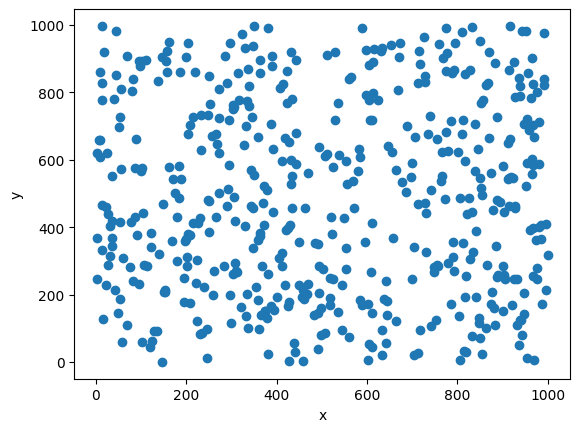

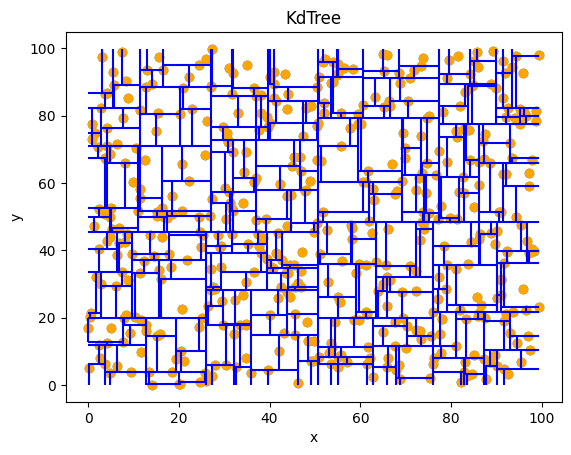

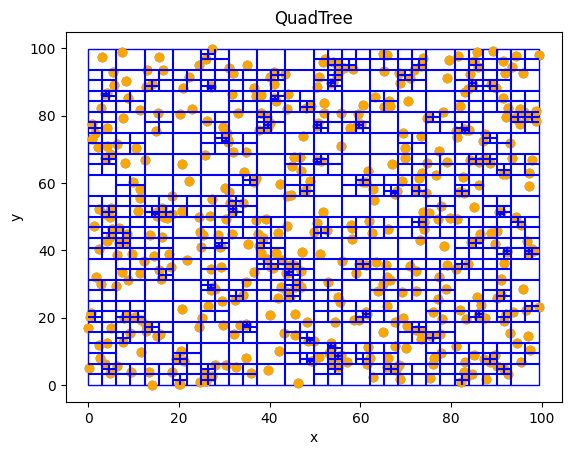

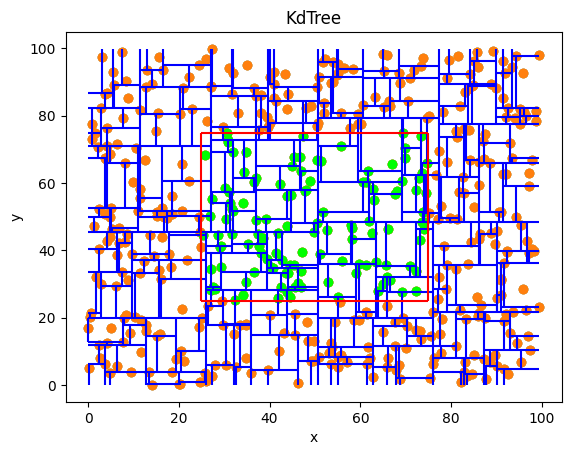

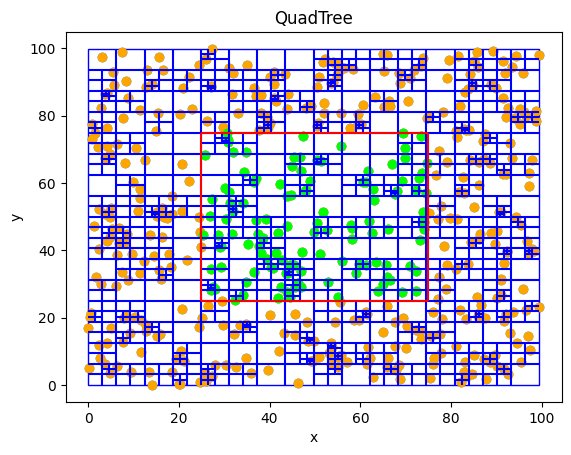

In [30]:
generate_visualization(cg.uniform_distribution, q_norm, Rectangle(Point([0,0]), Point([100,100])),Rectangle([25, 25], [75, 75]))

5.2 Rozkład normalny

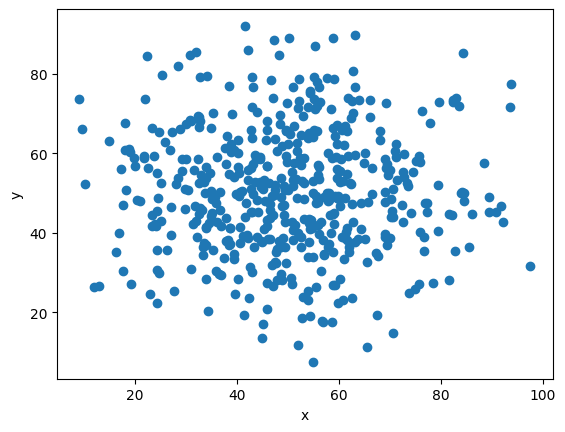

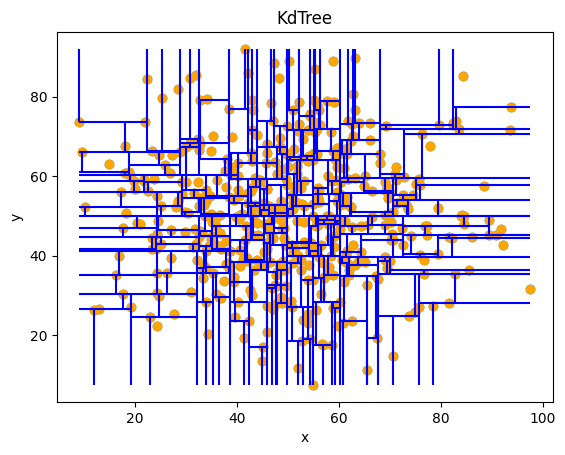

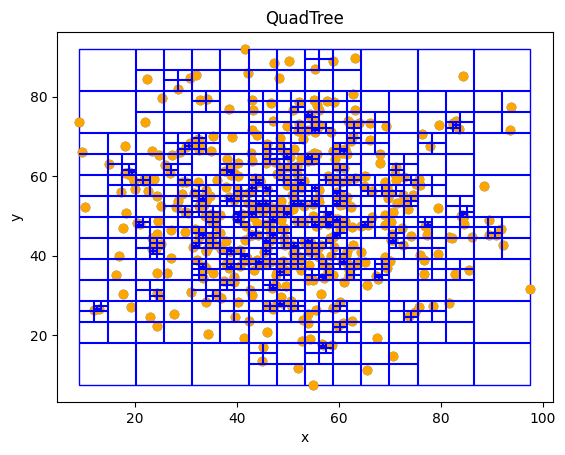

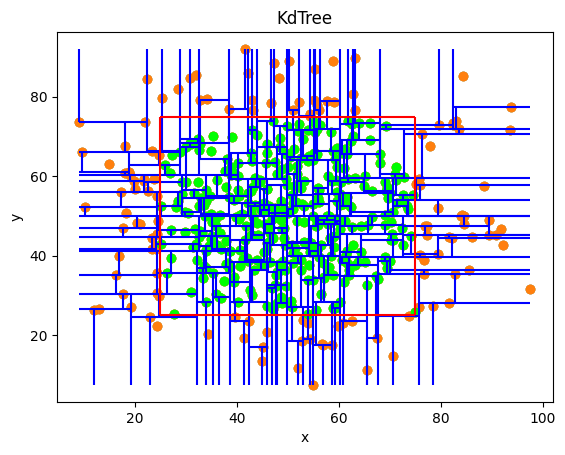

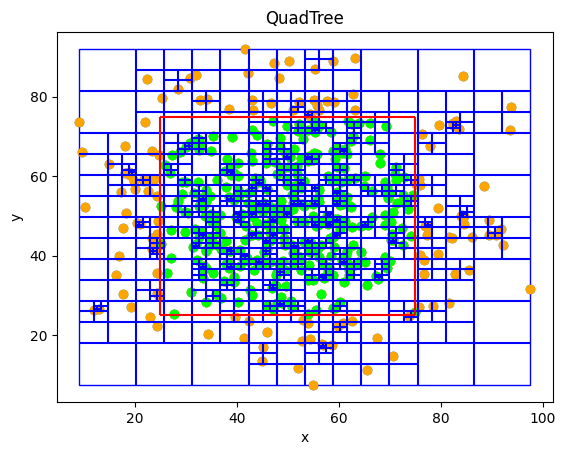

In [6]:
generate_visualization(cg.normal_distribution, q_norm, Rectangle(Point([0,0]), Point([100,100])),Rectangle([25, 25], [75, 75]))

5.3 Rozkład "posadzka"

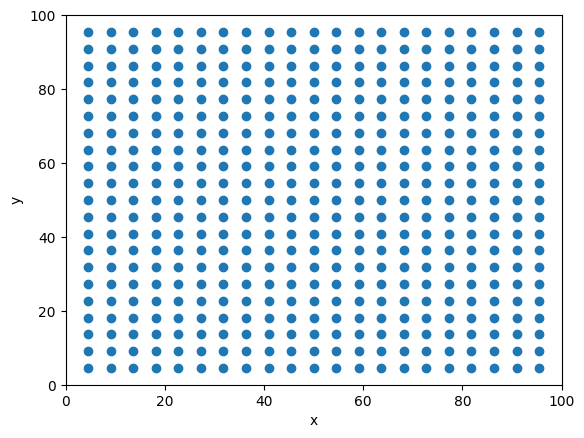

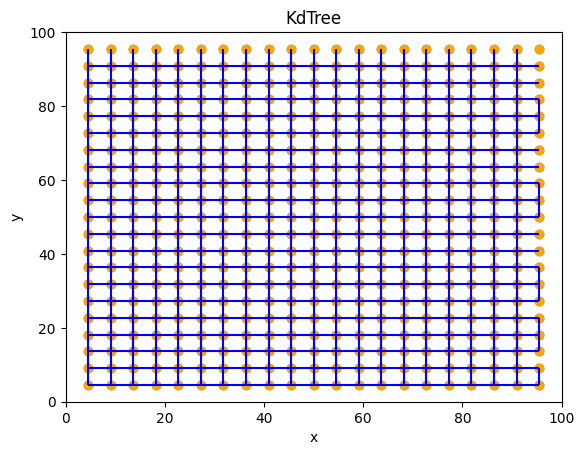

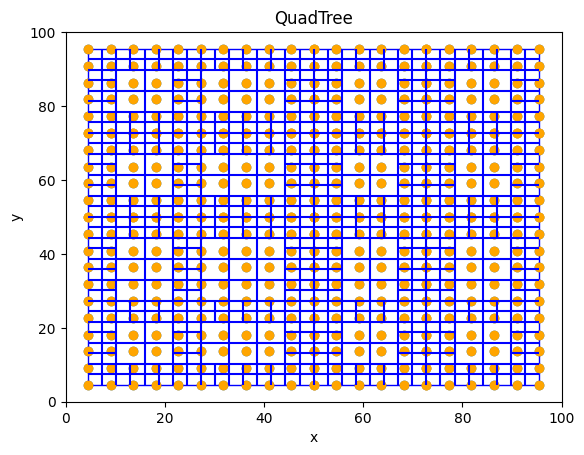

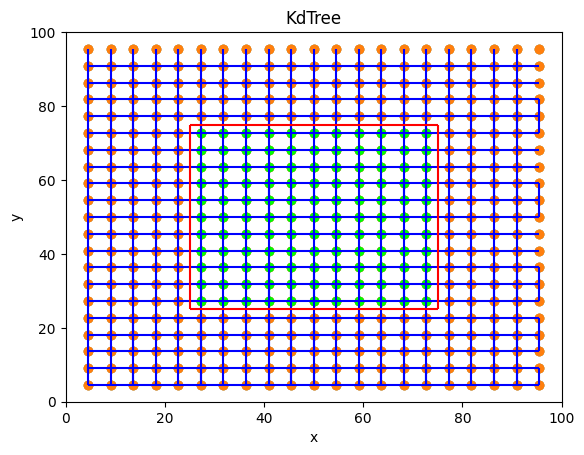

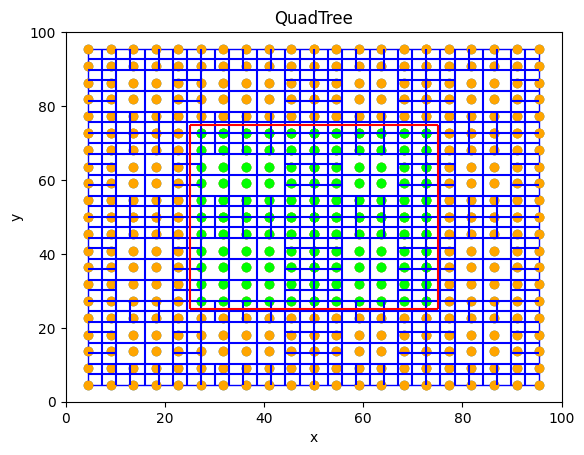

In [4]:
generate_visualization(cg.grid_distribution, q_grid, Rectangle(Point([0,0]), Point([100,100])),Rectangle([25, 25], [75, 75]))

5.4.1 Rozkład klastrowy 1

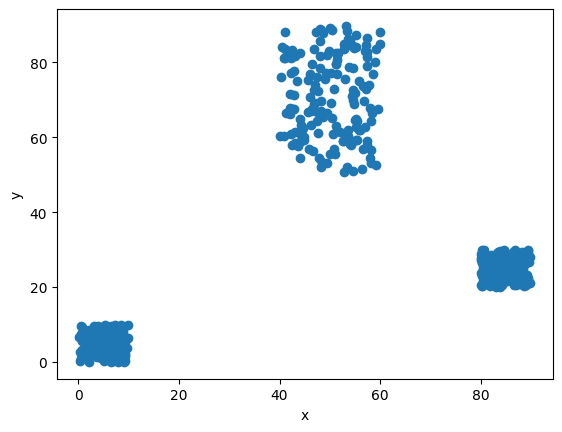

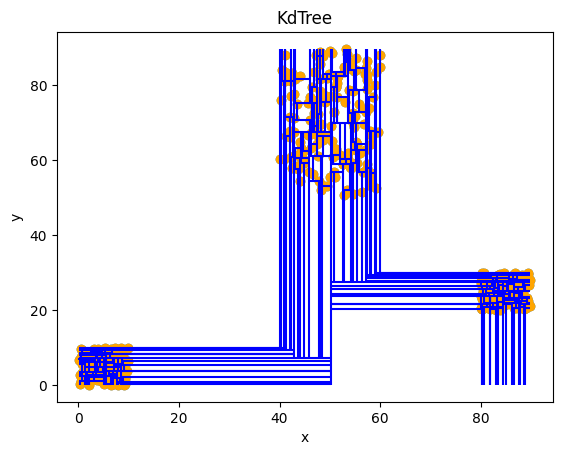

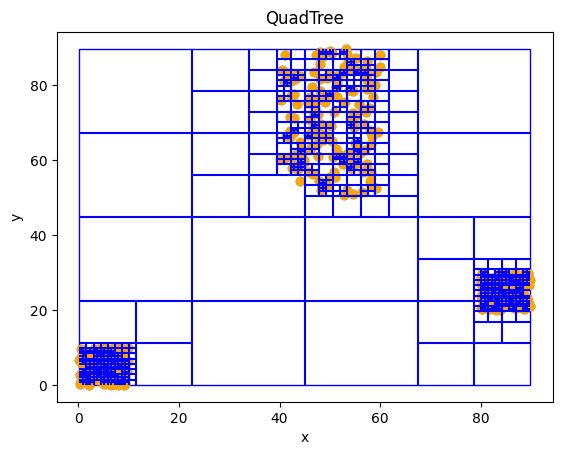

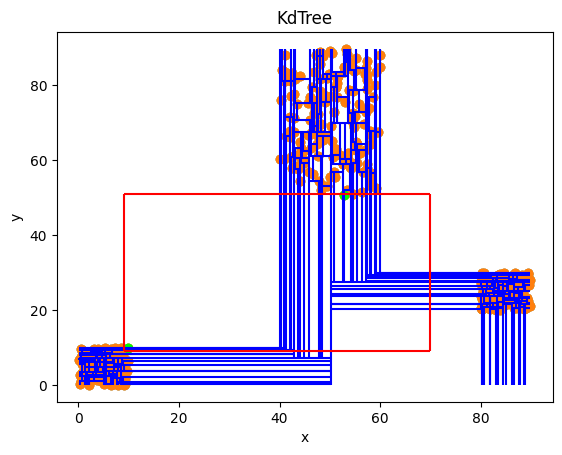

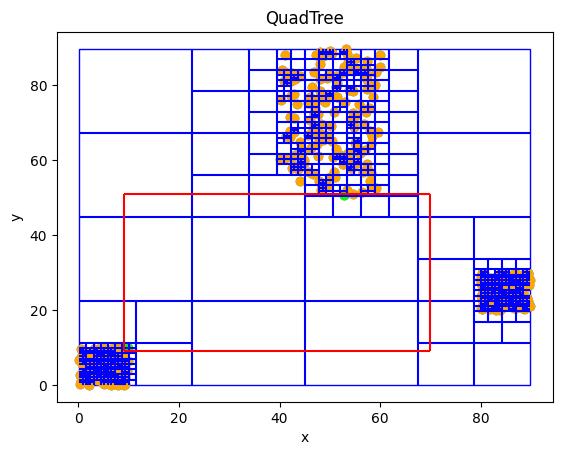

In [6]:
generate_visualization(cg.cluster_distribution, q_clust, (Rectangle(Point([0,0]), Point([10,10])), Rectangle(Point([40,50]), Point([60,90])), Rectangle(Point([80,20]), Point([90,30]))),Rectangle([9, 9], [70, 51]))

5.4.2 Rozkład klastrowy 2

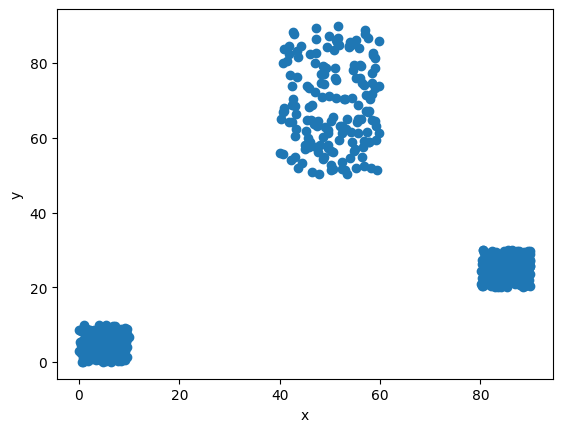

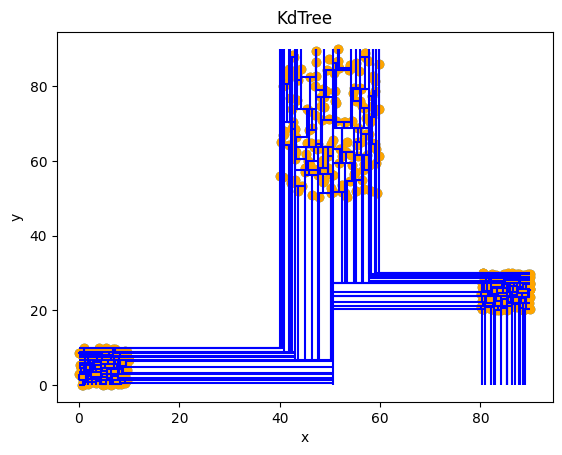

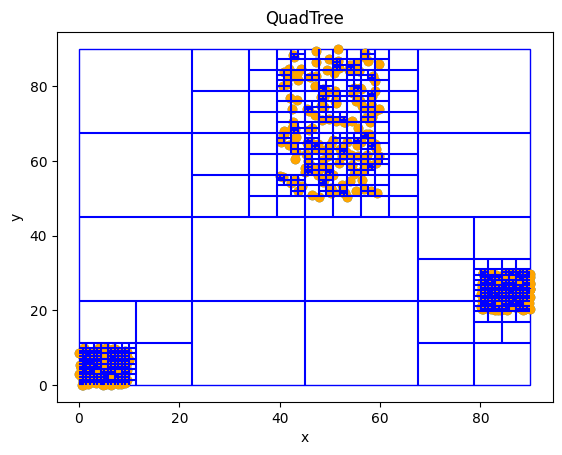

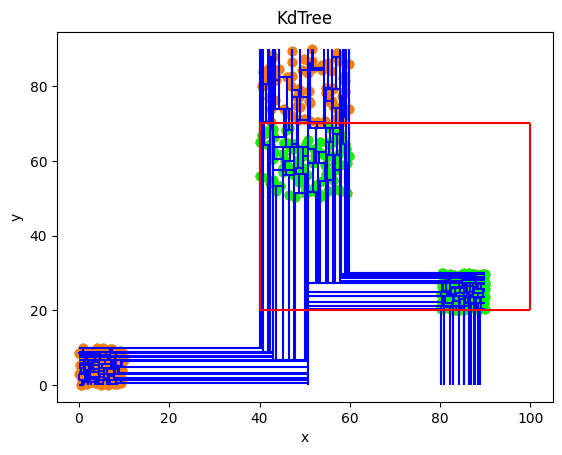

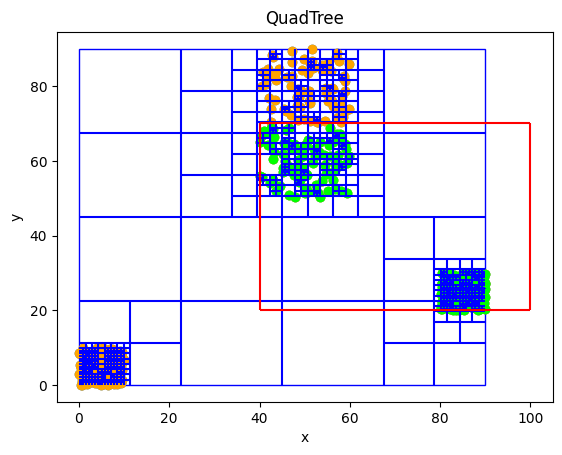

In [33]:
generate_visualization(cg.cluster_distribution, q_clust, (Rectangle(Point([0,0]), Point([10,10])), Rectangle(Point([40,50]), Point([60,90])), Rectangle(Point([80,20]), Point([90,30]))),Rectangle([40, 20], [100, 70]))

5.5.1 Rozkład z wartościami odstającymi 1

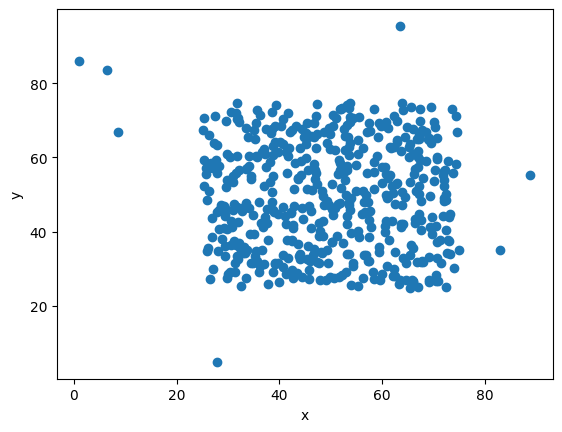

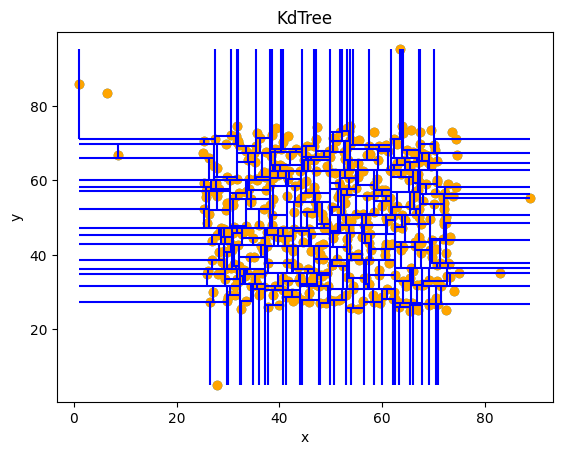

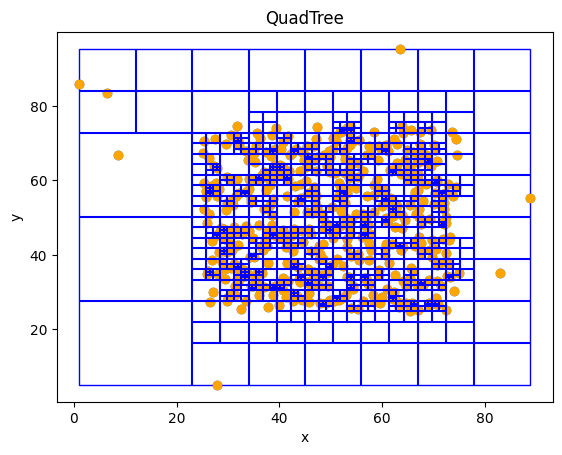

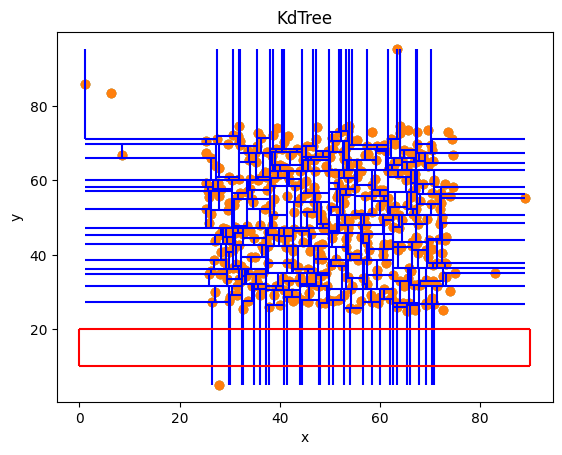

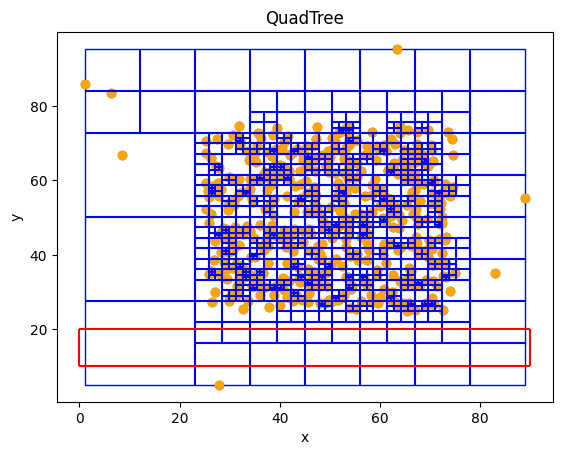

In [10]:
generate_visualization(cg.outliers_distribution, q_out, Rectangle(Point([0,0]), Point([100,100])),Rectangle([0,10], [90,20]))

5.5.2 Rozkład z wartościami odstającymi 2

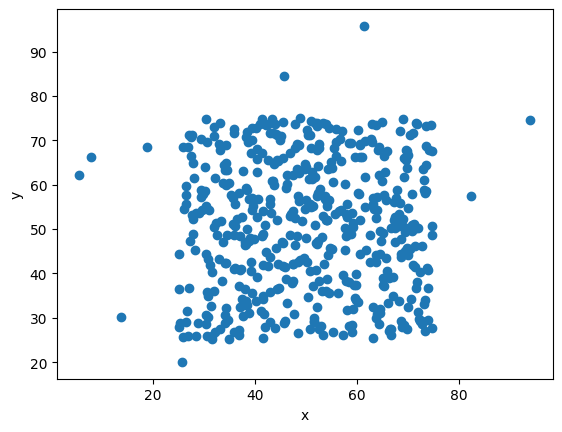

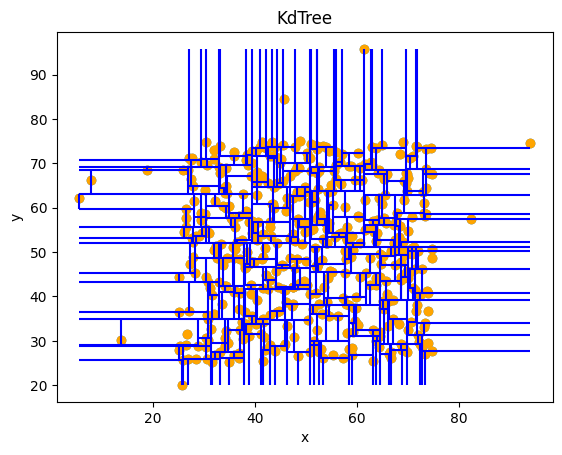

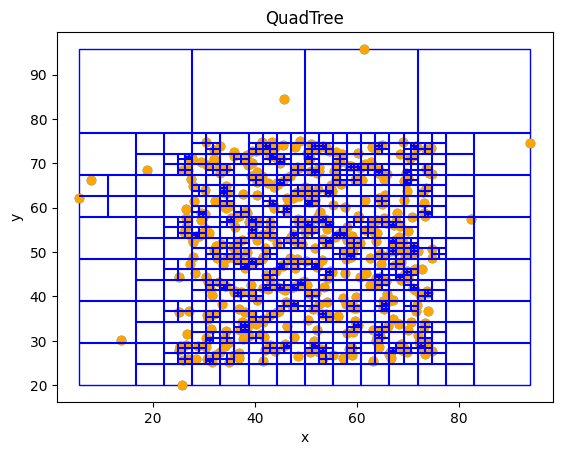

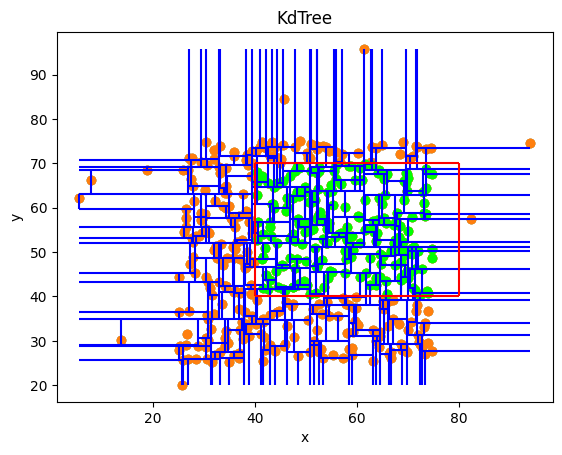

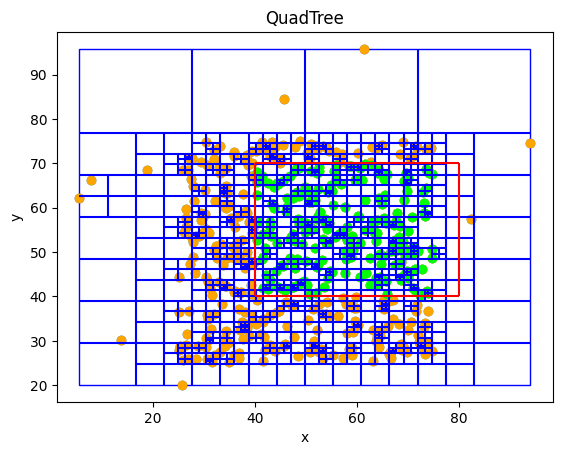

In [11]:
generate_visualization(cg.outliers_distribution, q_out, Rectangle(Point([0,0]), Point([100,100])),Rectangle([40,40], [80,70]))

5.6 Rozkład krzyżowy

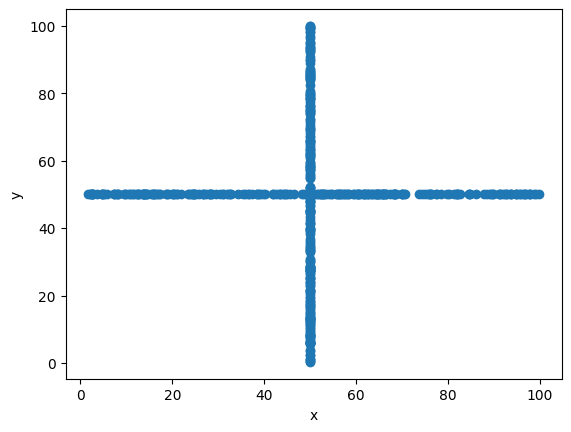

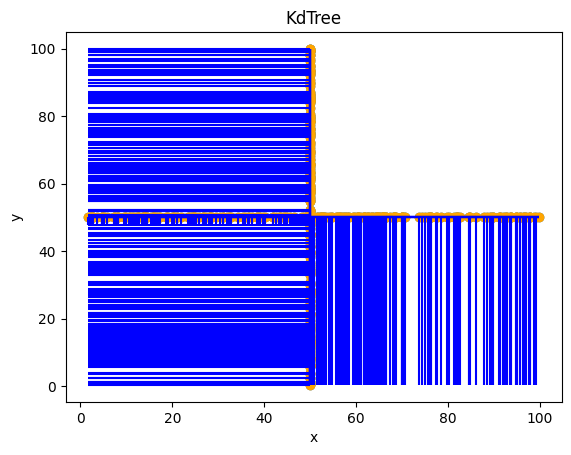

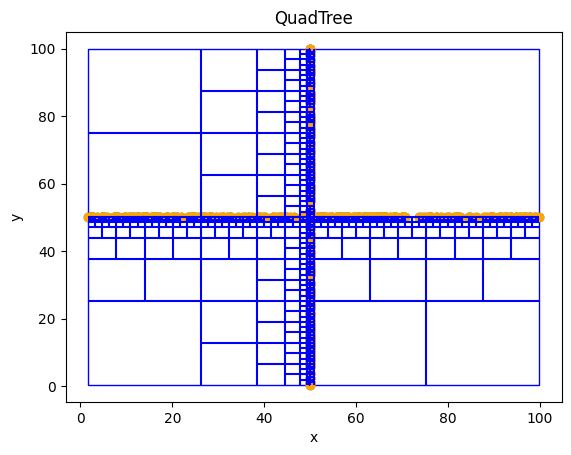

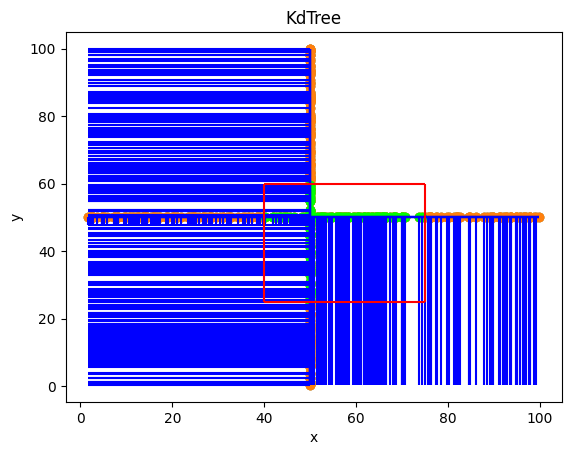

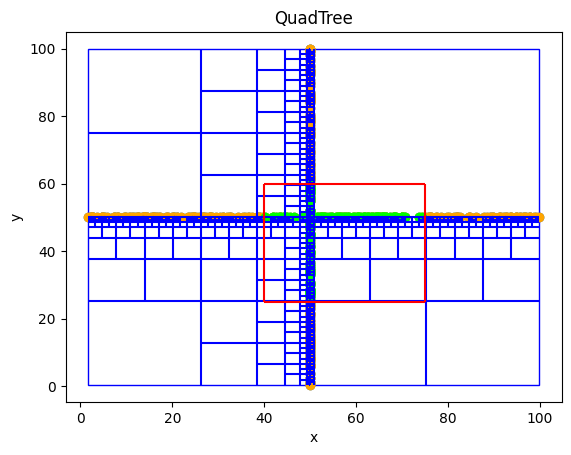

In [13]:
generate_visualization(cg.cross_distribution, q_cross, Rectangle(Point([0,0]), Point([100,100])),Rectangle([40,25], [75, 60]))

5.7 Rozkład prostokątny

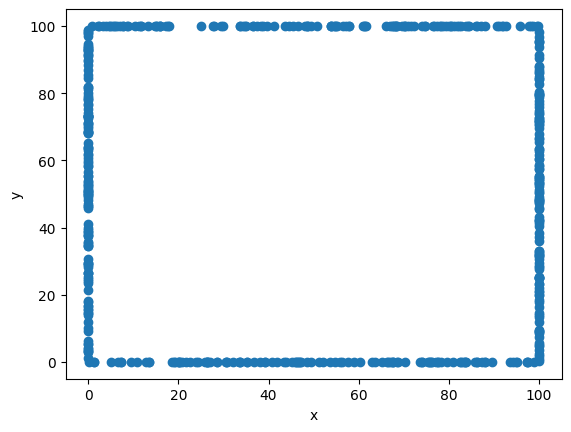

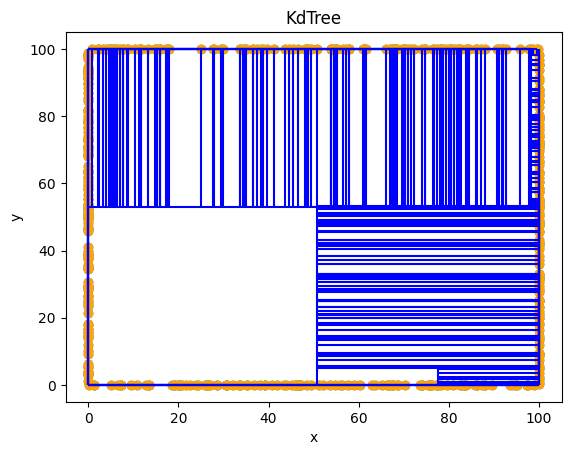

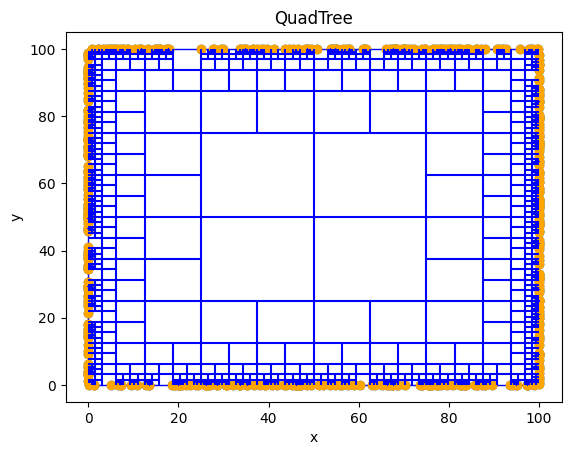

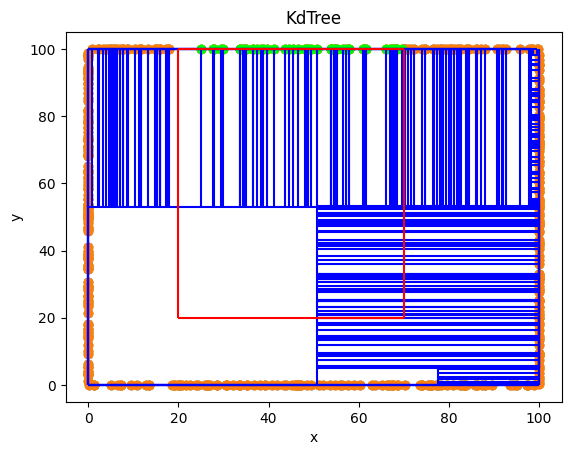

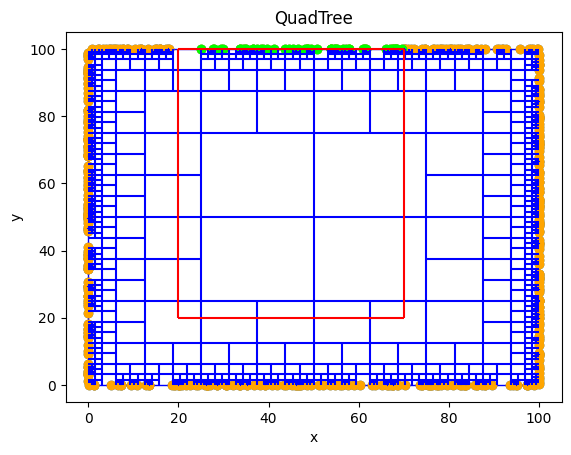

In [14]:
generate_visualization(cg.rectangle_distribution, q_norm, Rectangle(Point([0,0]), Point([100,100])),Rectangle([20,20], [70,100]))

------------------------------------------------------------------------------------------------------------------------------------------------